In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape: ", x_train.shape)
print("Testing data shape: ", x_test.shape)

Training data shape:  (60000, 28, 28)
Testing data shape:  (10000, 28, 28)


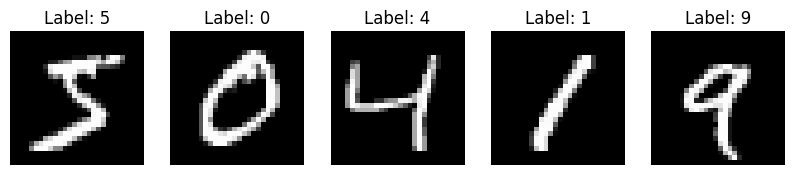

In [18]:
plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(1,5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')

plt.show()

In [19]:
#Data Preprocessing

#Reshaping the data into 4D
x_train = x_train.reshape(-1, 28, 28, 1).astype(float) # refers to (number of samples, height px, width px, channel = 1 for greyscale and 3 for RGB)
x_test = x_test.reshape(-1, 28, 28, 1).astype(float)

#Normalisation => we know that the pixel varies from 0 to 255. When divided by 255, it will normalise the samples between 0 to 1.
x_train = x_train / 255.0
x_test = x_test / 255.0

#convering target into categorical variable. One hot encoding. e.g. 3 = (0,0,0,1,0,0,0,0,0,0,0)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [20]:
#Build CNN Model

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),  #coverts the 3d to 1d
    layers.Dense(64, activation='relu'), #fully connected layers with 64 neurons
    layers.Dense(10, activation='softmax') # O/P layer is with 10 values - each for digit 0-9

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
#COmpile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [22]:
#Train the model
history = model.fit(x_train, y_train, epochs = 5, batch_size = 64, validation_split =0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.8692 - loss: 0.4368 - val_accuracy: 0.9795 - val_loss: 0.0644
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.9806 - loss: 0.0595 - val_accuracy: 0.9870 - val_loss: 0.0458
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9871 - loss: 0.0395 - val_accuracy: 0.9902 - val_loss: 0.0351
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9901 - loss: 0.0303 - val_accuracy: 0.9898 - val_loss: 0.0327
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9937 - loss: 0.0200 - val_accuracy: 0.9913 - val_loss: 0.0326


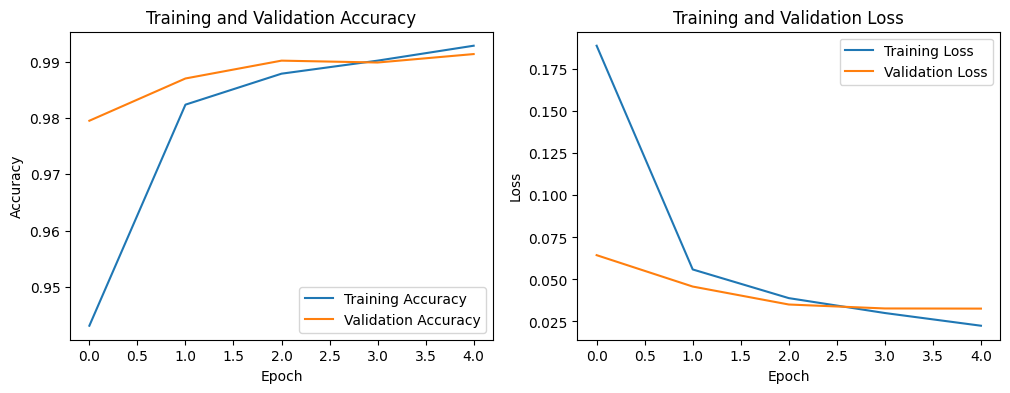

In [23]:
# prompt: plot traning accuracy and loss

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [26]:
#Evaluate on the test data

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9882 - loss: 0.0341
Test Accuracy: 0.991000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


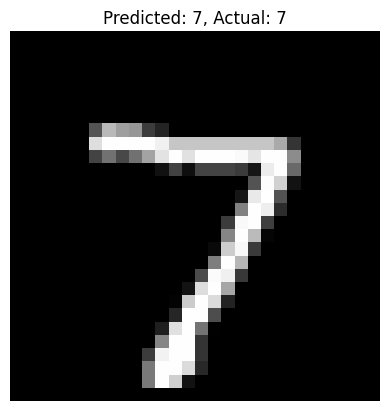

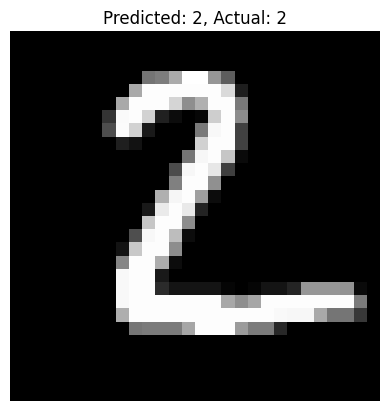

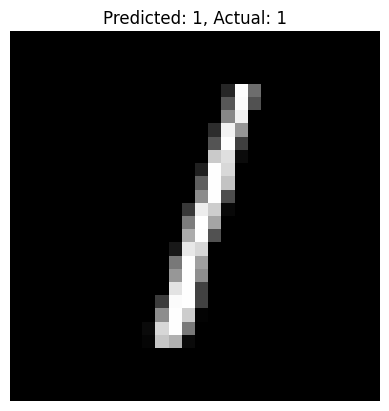

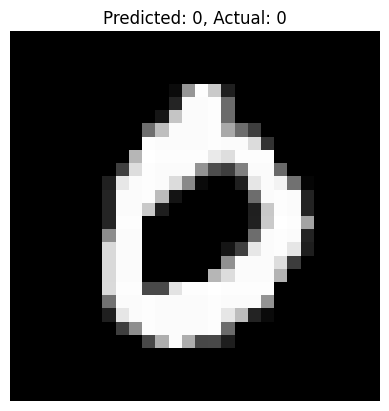

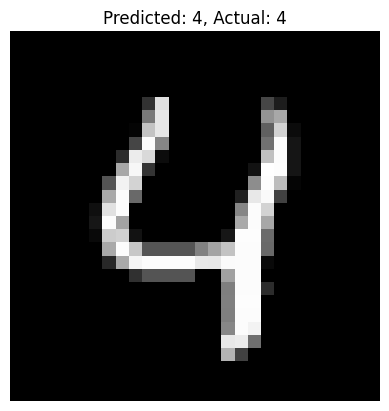

In [28]:
# Make Prediction and Visualize

pred_probs = model.predict(x_test[:5]).  # pred_prob[0] = [0.01,0.03,0.05,0.90,0.01,0.00,0.00,0.00,0.00,0.00]
pred_class = np.argmax(pred_probs, axis = 1)
true_class = np.argmax(y_test[:5], axis = 1)

#Show predictions

for i in range(5):
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted: {pred_class[i]}, Actual: {true_class[i]}")
  plt.axis('off')
  plt.show()


Embeddings:


King, Queen, Man, Woman, Car







King = Queen

King - Man + Woman =. Queen


